In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

In [5]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


### Waffle charts

In [6]:
#Using the case study of Denmark,Sewden,Norway
df_dsn=df_can.loc[['Denmark','Sweden','Norway'],:]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327


In [7]:
# step 1: determing proprtion wrt to Total
total_val=sum(df_dsn['Total'])
category_proportions=[float(value)/total_val for value in df_dsn['Total']]
for i,proportion in enumerate(category_proportions):
    print(df_dsn.index[i],':',proportion)

Denmark : 0.32255663965602777
Sweden : 0.48503390110798744
Norway : 0.1924094592359848


In [8]:
# Step 2: determing the height of waffle.
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [9]:
#Step 3: using the proportions to determine the number of tiles
total_tiles=[round(total_num_tiles*proportion) for proportion in category_proportions]
for i,tiles in enumerate(total_tiles):
    print(df_dsn.index[i],':',tiles)

Denmark : 129
Sweden : 194
Norway : 77


In [10]:
#Step 4: Creating the matrix and populating it.
waffle_chart=np.zeros((height,width))

category_index=0   # Markers for tracking the tiles allocation. 
tile_index=0

for col in range(width):
    for row in range(height):
        tile_index+=1
        
        if tile_index > sum(total_tiles[0:category_index]):
            category_index+=1
        waffle_chart[row,col]=category_index
print('Waffle Chart Populated.')
waffle_chart

Waffle Chart Populated.


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

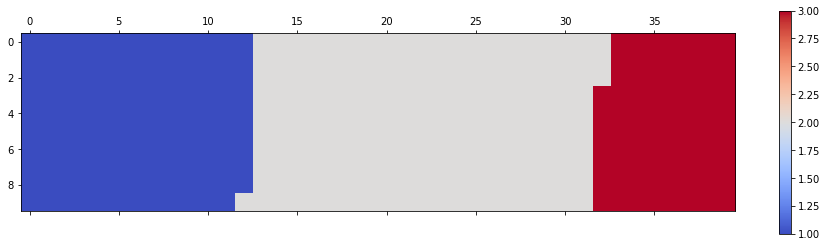

In [11]:
# Step 5 : Mapping the waffle chart to visual.
fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

<Figure size 432x288 with 0 Axes>

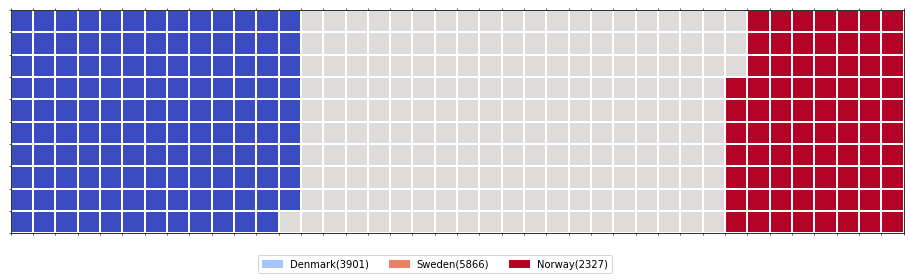

In [12]:
#prettify the figure and adding legends
fig=plt.figure()
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar

ax=plt.gca()
ax.set_xticks(np.arange(-0.5,(width),1),minor=True)
ax.set_yticks(np.arange(-0.5,(height),1),minor=True)
ax.grid(which='minor',color='w',linestyle='-',linewidth=2)
plt.xticks([])
plt.yticks([])

values_cumsum=np.cumsum(df_dsn['Total'])
total_values=values_cumsum[len(values_cumsum)-1]

legend_values=[]
for i,category in enumerate(df_dsn.index.values):
    leg_str=category+'('+str(df_dsn['Total'][i])+')'
    colorval=colormap(float(values_cumsum[i])/total_values)
    legend_values.append(mpatches.Patch(color=colorval,label=leg_str))

plt.legend(handles=legend_values,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

### Seaborn

In [13]:
import seaborn as sns

In [14]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

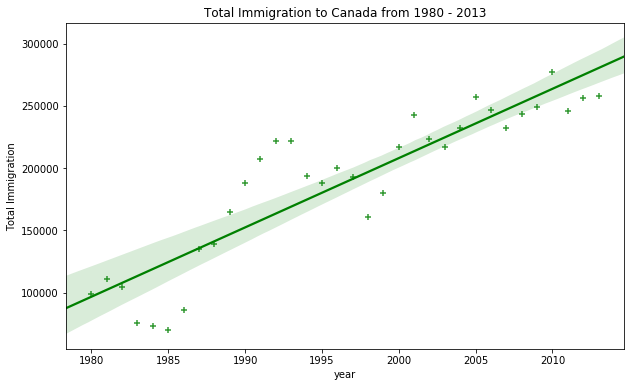

In [15]:
fig=plt.figure(figsize=(10,6))
ax=sns.regplot(x='year',y='total',data=df_tot,marker='+',color='green')
ax.set(xlabel='year',ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Immigration of Denmark,Sweden, Norway from 1980-2013')

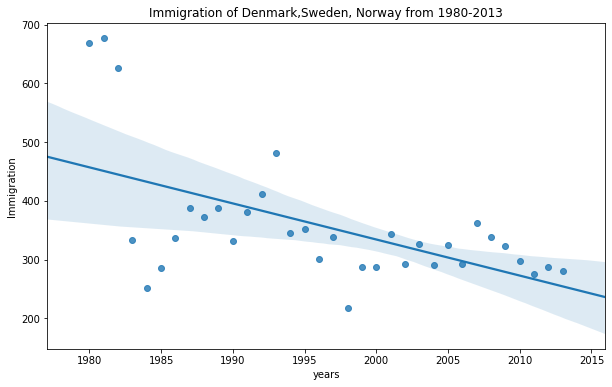

In [16]:
df_dsn1=df_dsn[years].transpose()
total=pd.DataFrame(df_dsn1.sum(axis=1))
total.index=map(int,total.index)
total.reset_index(inplace=True)
total.rename(columns={'index':'year',0:'total_count'},inplace=True)
fig=plt.figure(figsize=(10,6))
ax=sns.regplot(x='year',y='total_count',data=total)
ax.set(xlabel='years',ylabel='Immigration')
ax.set_title('Immigration of Denmark,Sweden, Norway from 1980-2013')

### Creating Maps and Visualizing Geospatial Data

In [17]:
import folium

In [18]:
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map

In [19]:
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display map
world_map

In [20]:
world_map = folium.Map(tiles='Mapbox Bright')

# display map
world_map

### Choropleth Maps

In [21]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [22]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [23]:
df_can.shape

(195, 43)

In [24]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


In [25]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [26]:
import requests
url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json'
data=requests.get(url)
print('GeoJSON file downloaded!')


GeoJSON file downloaded!


<Response [200]>

In [38]:
jsondata=data.json()
for i in jsondata['features']:
    print(i['properties']['name'])

Afghanistan
Angola
Albania
United Arab Emirates
Argentina
Armenia
Antarctica
French Southern and Antarctic Lands
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
The Bahamas
Bosnia and Herzegovina
Belarus
Belize
Bolivia
Brazil
Brunei
Bhutan
Botswana
Central African Republic
Canada
Switzerland
Chile
China
Ivory Coast
Cameroon
Democratic Republic of the Congo
Republic of the Congo
Colombia
Costa Rica
Cuba
Northern Cyprus
Cyprus
Czech Republic
Germany
Djibouti
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands
France
Gabon
United Kingdom
Georgia
Ghana
Guinea
Gambia
Guinea Bissau
Equatorial Guinea
Greece
Greenland
Guatemala
Guyana
Honduras
Croatia
Haiti
Hungary
Indonesia
India
Ireland
Iran
Iraq
Iceland
Israel
Italy
Jamaica
Jordan
Japan
Kazakhstan
Kenya
Kyrgyzstan
Cambodia
South Korea
Kosovo
Kuwait
Laos
Lebanon
Liberia
Libya
Sri Lanka
Lesotho
Lithuania
Luxembourg
Latvia
Morocco
Moldova
Madagascar
M

In [48]:
worldmap=folium.Map(location=[0,0],zoom_start=4,tiles='Mapbox Bright')
worldmap.choropleth(geo_data=jsondata,
                   data=df_can,
                   columns=['Country','Total'],
                   key_on='feature.properties.name',
                   fill_color='YlOrRd', 
                   fill_opacity=0.7, 
                   line_opacity=0.2,
                   legend_name='Immigration to Canada',
                   )
worldmap

C:\Users\pawan\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### Working With crime datatset in san Francisco in 2016.

In [49]:
df_incident=pd.read_csv('Pd.csv')
df_incident.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [50]:
df_incident.shape

(150500, 13)

In [55]:
limit=100
df_incident=df_incident.iloc[0:limit,:]
df_incident.shape

(100, 13)

In [56]:
latitude = 37.77
longitude = -122.42
sanfran_map=folium.Map(location=[latitude,longitude],zoom_start=12)
sanfran_map

In [60]:
#Imposing the location of crime on  map.
incidents=folium.map.FeatureGroup()
for lat,long  in zip(df_incident.Y,df_incident.X):
    incidents.add_child(
    folium.CircleMarker([lat,long],radius=5,color='yellow',fill=True,fill_color='blue',fill_opacity=0.6))
sanfran_map.add_child(incidents)

In [62]:
#adding popup text.
incidents=folium.map.FeatureGroup()
for lat,long in zip(df_incident.Y,df_incident.X):
    incidents.add_child(
        folium.CircleMarker([lat,long],radius=5,color='Yellow',fill=True,fill_opacity=0.6,fill_color='blue')
    )
sanfran_map.add_child(incidents)

for lat,long,label in zip(df_incident.Y,df_incident.X,df_incident.Category):
    folium.Marker([lat,long],popup=label).add_to(sanfran_map)
sanfran_map.add_child(incidents)

In [64]:
from folium import plugins
incidents=plugins.MarkerCluster().add_to(sanfran_map)
for lat,long,label in zip(df_incident.Y,df_incident.X,df_incident.Category):
    folium.Marker(location=[lat,long],icon=None,popup=label).add_to(incidents)
sanfran_map